## Práctica de Modelamniento de Red Neuronal: Clasificación

In [ ]:
!pip install torch torchvision

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Preparación de la data

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Características (longitud del sépalo, ancho del sépalo, etc.)
y = iris.target

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris

<Axes: >

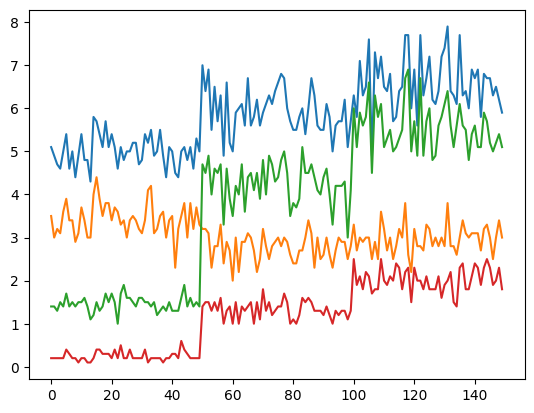

In [29]:
X_df = pd.DataFrame(X)
X_df[0].plot()
X_df[1].plot()
X_df[2].plot()
X_df[3].plot()

In [8]:
X_df.isna().sum()

,0
0,0
1,0
2,0
3,0


In [9]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
X_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
X.shape

(150, 4)

In [27]:
X.max(axis=0)

array([7.9, 4.4, 6.9, 2.5])

In [31]:
X_n = X/X.max()

In [46]:
X_ndf = pd.DataFrame(X_n)

<Axes: >

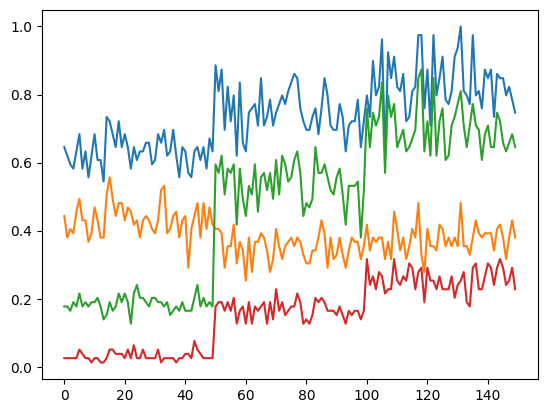

In [47]:
X_ndf[0].plot()
X_ndf[1].plot()
X_ndf[2].plot()
X_ndf[3].plot()

In [12]:
type(y)

numpy.ndarray

In [13]:
y.shape

(150,)

In [14]:
y_df = pd.DataFrame(y)
y_df.value_counts()

,count
0,
0,50
1,50
2,50


In [15]:
n_cat = len(y_df[0].unique())

In [32]:
X_tensor = torch.tensor(X_n, dtype=torch.float32)  # Convertir a tensor de tipo float32
y_tensor = torch.tensor(y, dtype=torch.long)
X_tensor.shape, y_tensor.shape

(torch.Size([150, 4]), torch.Size([150]))

In [33]:
type(X_tensor)

torch.Tensor

### Modelamiento

1. ¿qué tipo de data tiene mi dataset? Numerica, categorica, fechas?
2. que quiero hacer con el modelo? clasificar? regresionar?

3. qué funciones computacionales debo seleccionar para que funcione mi red neuronal correctamente?


---> optimización del aprendizaje<br>
LR: learning_rate <br>
---> reducción del error<br>
---> activación <br>
---> regularizacion


* Un modelamiento previo con ML tradicional: AD, RL, RLog
* Entrenar una RNA con la data completa
* X_tr, y_tr, X_ts, y_ts = train_test_split()

In [18]:
input_size = len(X_df.columns)

In [71]:
class SimpleNN(nn.Module):
    def __init__(self, in_size, n_cat):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(in_size, 64)  # Capa totalmente conectada
        self.fc2 = nn.Linear(64, 8)
        self.fc3 = nn.Linear(8, n_cat) # Capa de salida

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Activación ReLU para la primera capa
        x = F.relu(self.fc2(x))
        x = self.fc3(x)          # Salida de la red sin activación
        return x

In [72]:
input_size, n_cat

(4, 3)

In [73]:
model = SimpleNN(input_size, n_cat)
print(model)

SimpleNN(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)


Complejidad realidad

Complejidad del modelo

In [74]:
# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()   # Función de pérdida para clasificación multiclase
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam

In [75]:
# Ejemplo de un ciclo de entrenamiento
for epoch in range(1000):  # Número de épocas de entrenamiento
    optimizer.zero_grad()  # Poner a cero los gradientes antes de la pasada hacia adelante
    outputs = model(X_tensor)  # Pasada hacia adelante
    loss = criterion(outputs, y_tensor)  # Calcular la pérdida
    loss.backward()  # Pasada hacia atrás para calcular los gradientes
    optimizer.step()  # Actualizar los pesos

    if (epoch+1) % 50 == 0:  # Mostrar la pérdida cada 10 épocas
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

Epoch [50/100], Loss: 1.0546
Epoch [100/100], Loss: 0.9475
Epoch [150/100], Loss: 0.7824
Epoch [200/100], Loss: 0.6122
Epoch [250/100], Loss: 0.4905
Epoch [300/100], Loss: 0.4024
Epoch [350/100], Loss: 0.3291
Epoch [400/100], Loss: 0.2671
Epoch [450/100], Loss: 0.2181
Epoch [500/100], Loss: 0.1810
Epoch [550/100], Loss: 0.1534
Epoch [600/100], Loss: 0.1325
Epoch [650/100], Loss: 0.1162
Epoch [700/100], Loss: 0.0998
Epoch [750/100], Loss: 0.0883
Epoch [800/100], Loss: 0.0798
Epoch [850/100], Loss: 0.0732
Epoch [900/100], Loss: 0.0680
Epoch [950/100], Loss: 0.0637
Epoch [1000/100], Loss: 0.0603


In [76]:
len(outputs)

150

In [77]:
outputs[0:10]

tensor([[ 14.1119,   5.2678, -18.2715],
        [ 12.9599,   5.0339, -17.1809],
        [ 13.6861,   5.0821, -17.6788],
        [ 12.5949,   4.9268, -16.7787],
        [ 14.2157,   5.2600, -18.3390],
        [ 12.7152,   5.1993, -17.4347],
        [ 13.2225,   5.0160, -17.2952],
        [ 13.4016,   5.1512, -17.6651],
        [ 12.5163,   4.8452, -16.5627],
        [ 13.1767,   5.0820, -17.3952]], grad_fn=<SliceBackward0>)

In [78]:
probabilities = F.softmax(outputs, dim=1)
predicted_category = torch.argmax(probabilities, dim=1)
y_pred = predicted_category.detach().numpy()
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [80]:
verifica = pd.DataFrame()
verifica['original'] = y
verifica['predicho'] = y_pred
verifica['compara'] = verifica.original == verifica.predicho
verifica.compara.value_counts()

,count
compara,
True,149
False,1
